In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import binarize
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import * # import all functions from this script
# from math import log10
from scipy import stats

# random sample consimment between runs
import random
# set random seed
random.seed(10)


%matplotlib inline



In [2]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]
omc_pt = [(omc_type[i][omc_type[i]['type']==1000]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_type[i][omc_type[i]['type']==10]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'MMus':
        omc_mm.append(omc_type[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_type[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)


In [3]:

for i in range(len(omc_it_mm)):
    omc_it_mm[i] = clean_up_data(omc_it_mm[i])

for i in range(len(omc_pt_mm)):
    omc_pt_mm[i] = clean_up_data(omc_pt_mm[i])

for i in range(len(omc_it_st)):
    omc_it_st[i] = clean_up_data(omc_it_st[i])

for i in range(len(omc_pt_st)):
    omc_pt_st[i] = clean_up_data(omc_pt_st[i])

omc_it_mm_all = pd.concat(omc_it_mm)
omc_it_st_all = pd.concat(omc_it_st)

omc_pt_mm_all = pd.concat(omc_pt_mm)
omc_pt_st_all = pd.concat(omc_pt_st)

# Example Lab mouse

In [ ]:
plot = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)

sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

In [ ]:
# just plot OMCc
area = 'OMCc'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
# plot

In [ ]:
area = 'AUD'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

In [ ]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)
sample
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

In [ ]:
plot = omc_it_st_all.sample(1000, random_state=10).reset_index(drop=True)

sns.heatmap(plot, cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

# just plot OMCc
area = 'OMCc'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

# plot aud
area = 'AUD'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st_all.sample(1000, random_state=10).reset_index(drop=True)
sample
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

# example lab mouse

In [ ]:
plot = omc_it_mm[1]

sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

In [ ]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm[1]['OMCc']
# aud_omc = sample['OMCc'] + sample['AUD']
# both = aud_omc == 2
plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

In [ ]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm[1]['AUD']
# aud_omc = sample['OMCc'] + sample['AUD']
# both = aud_omc == 2
plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

In [ ]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm[1]
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

# example steg


In [ ]:
plot = omc_it_st[1]
#plot all
sns.heatmap(plot, cmap=orange_cmp, cbar=False)

# plot omcc intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st[1]['OMCc']
plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=orange_cmp, cbar=False)

# plot aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st[1]['AUD']

plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=orange_cmp, cbar=False)

# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st[1]
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=orange_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

## obs vs. expected

In [ ]:
def calc_overlap(df, area1='OMCc', area2='AUD'):
    combination = df[area1] + df[area2]
    overlap = combination == 2
    return(pd.DataFrame(overlap, columns=[area1 + ' ' + area2]))

In [ ]:
overlap_df = pd.DataFrame(columns=["OMCc_AUD_obs", "obs_prop", "calc_prop", "total", "OMCc_tot", "AUD_tot", "Species", "Mouse", "Dataset"])

for i in range(len(omc_it_mm)):
    df = omc_it_mm[i]
    overlap = calc_overlap(df).sum()[0]
    omcc = (df["OMCc"] > 0).sum()
    aud = (df["AUD"] > 0).sum()
    obs_prop = overlap/df.shape[0]
    calc_proportion = (omcc/df.shape[0]) * (aud/df.shape[0])
    overlap_df.loc[len(overlap_df.index)] = [overlap, obs_prop, calc_proportion, df.shape[0], omcc, aud, "MMus", mice_mm[i], dataset_mm[i]]
    
for i in range(len(omc_it_st)):
    df = omc_it_st[i]
    overlap = calc_overlap(df).sum()[0]
    omcc = (df["OMCc"] > 0).sum()
    aud = (df["AUD"] > 0).sum()
    obs_prop = overlap/df.shape[0]
    calc_proportion = (omcc/df.shape[0]) * (aud/df.shape[0])
    overlap_df.loc[len(overlap_df.index)] = [overlap, obs_prop, calc_proportion, df.shape[0], omcc, aud, "STeg", mice_st[i], dataset_st[i]]

overlap_df

In [ ]:
# plot obs vs expected
x = np.linspace(0,0.2, 5)
y = x
plt.plot(x, y, color='red'
         , linestyle="--", linewidth=0.5)
sns.scatterplot(overlap_df, x="obs_prop", y="calc_prop", hue="Species")



In [ ]:
# just plot mmus
idx = overlap_df['Species'] == "MMus"
plot = overlap_df[idx]
dot = plot.iloc[1,:].to_frame().transpose()
x = np.linspace(0,0.2, 5)
y = x
plt.plot(x, y, color='red'
         , linestyle="--", linewidth=0.5)
sns.scatterplot(plot, x="obs_prop", y="calc_prop", color="black")
sns.scatterplot(dot, x='obs_prop', y='calc_prop')
plt.title("MMus")

In [ ]:
# just plot steg
idx = overlap_df['Species'] == "STeg"
plot = overlap_df[idx]
dot = plot.iloc[1,:].to_frame().transpose()
x = np.linspace(0,0.2, 5)
y = x
plt.plot(x, y, color='red'
         , linestyle="--", linewidth=0.5)
sns.scatterplot(plot, x="obs_prop", y="calc_prop", color="black")
sns.scatterplot(dot, x='obs_prop', y='calc_prop', color="orange")
plt.title("STeg")

# dot plot

In [ ]:
overlap_df

In [ ]:
# mmus = overlap_df[overlap_df["Species"] == "MMus"]
# steg = overlap_df[overlap_df["Species"] == "STeg"]
plot = pd.melt(overlap_df, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
sns.lineplot(plot, x="o_v_e", y='proportion', hue='Species', units="Mouse", estimator=None, 
             marker='o', alpha=0.75)
plt.xlabel("Observed v Expected")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



In [ ]:
# just plot mmus
mmus = overlap_df[overlap_df['Species']=="MMus"]
df = pd.melt(overlap_df, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
idx = df['Species'] == "MMus"
plot = df[idx]
dot = mmus.iloc[1,:].to_frame().transpose()
dot_p = pd.melt(dot, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
sns.lineplot(plot, x="o_v_e", y='proportion', units="Mouse", estimator=None, 
             marker='o', alpha=0.75, color='black')
sns.lineplot(dot_p, x="o_v_e", y='proportion', units="Mouse", estimator=None, 
             marker='o', color='blue')
plt.xlabel("Observed v Expected")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("MMus")

In [ ]:
# just plot mmus
steg = overlap_df[overlap_df['Species']=="STeg"]
df = pd.melt(overlap_df, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
idx = df['Species'] == "STeg"
plot = df[idx]
dot = steg.iloc[1,:].to_frame().transpose()
dot_p = pd.melt(dot, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
sns.lineplot(plot, x="o_v_e", y='proportion', units="Mouse", estimator=None, 
             marker='o', alpha=0.75, color='black')
sns.lineplot(dot_p, x="o_v_e", y='proportion', units="Mouse", estimator=None, 
             marker='o', color='orange')
plt.xlabel("Observed v Expected")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("STeg")

# Node plots

In [15]:
# all it cells - summary combine all cells from each species
# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_it_mm_all)
print(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_it_st_all)
print(node_proportion_st)

MMus
1.0    0.302055
2.0    0.665433
3.0    0.032511
dtype: float64


STeg
1.0    0.287466
2.0    0.638692
3.0    0.073842
dtype: float64


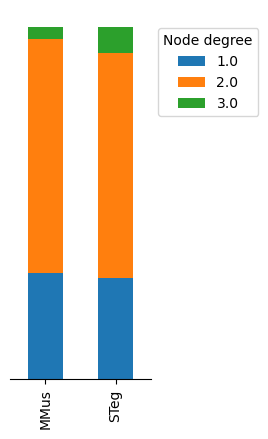

In [16]:
plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("IT Cells")
# plt.savefig(out_path+"mm_st_stack.jpeg", dpi=300

In [14]:
# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_it_mm, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_it_st, drop=['OMCi'], species='STeg')
nodes_it = pd.concat([nodes_mm, nodes_st])
# nodes_it

Text(0.5, 1.0, 'IT, node degree=1')

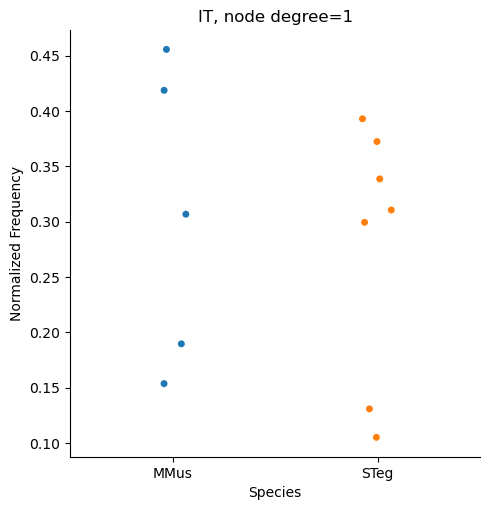

In [13]:
plot = nodes_it[nodes_it["Node Degree"]==1]
sns.catplot(plot, x="Species", y="Normalized Frequency", hue="Species")
plt.title("IT, node degree=1")

In [28]:
# AUD

# isolate aud cells
omc_it_mm_aud = []
for i in range(len(omc_it_mm)):
    df = omc_it_mm[i]
    aud = df[df['AUD']>0]
    omc_it_mm_aud.append(aud)

omc_it_mm_aud_all = pd.concat(omc_it_mm_aud)

omc_it_st_aud = []
for i in range(len(omc_it_st)):
    df = omc_it_st[i]
    aud = df[df['AUD']>0]
    omc_it_st_aud.append(aud)

omc_it_st_aud_all = pd.concat(omc_it_st_aud)


# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_it_mm_aud_all, drop=['OMCi'])
display(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_it_st_aud_all, drop=['OMCi'])
display(node_proportion_st)


MMus


1.0    0.025262
2.0    0.145853
3.0    0.828885
dtype: float64



STeg


1.0    0.204301
2.0    0.310036
3.0    0.485663
dtype: float64

Text(0.5, 1.0, 'IT AUD')

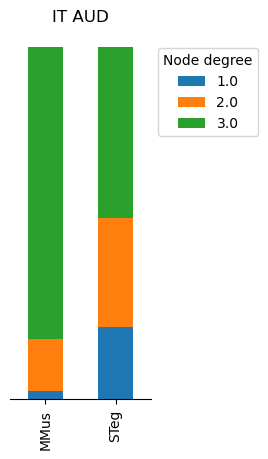

In [29]:
plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("IT AUD")
# plt.savefig(out_path+"mm_st_stack.jpeg", dpi=300


Text(0.5, 1.0, 'IT AUD, node degree=1')

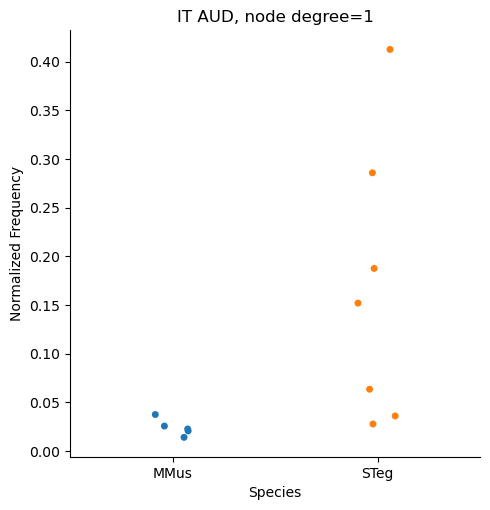

In [30]:

# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_it_mm_aud, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_it_st_aud, drop=['OMCi'], species='STeg')
nodes_it = pd.concat([nodes_mm, nodes_st])
# nodes_it
plot = nodes_it[nodes_it["Node Degree"]==1]
sns.catplot(plot, x="Species", y="Normalized Frequency", hue="Species")
plt.title("IT AUD, node degree=1")

# OMCc

MMus


1.0    0.114143
2.0    0.844167
3.0    0.041690
dtype: float64



STeg


1.0    0.166389
2.0    0.743581
3.0    0.090030
dtype: float64

Text(0.5, 1.0, 'IT OMCc, node degree=1')

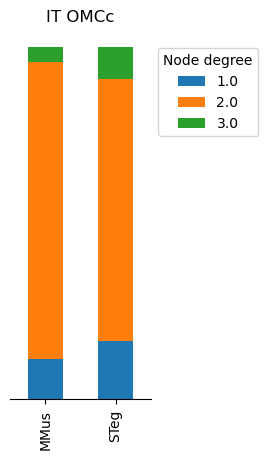

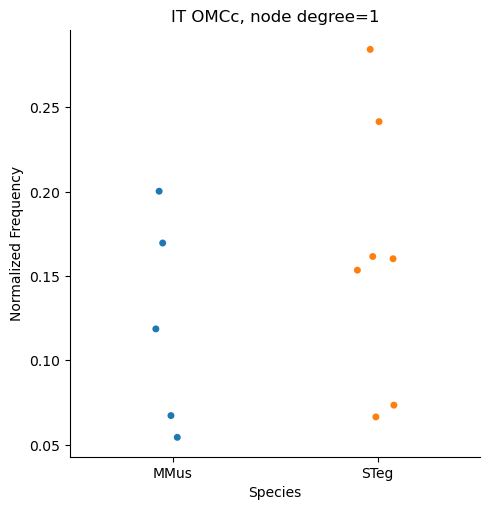

In [31]:
# OMCc

# isolate omcc cells
omc_it_mm_omcc = []
for i in range(len(omc_it_mm)):
    df = omc_it_mm[i]
    omcc = df[df['OMCc']>0]
    omc_it_mm_omcc.append(omcc)

omc_it_mm_omcc_all = pd.concat(omc_it_mm_omcc)

omc_it_st_omcc = []
for i in range(len(omc_it_st)):
    df = omc_it_st[i]
    omcc = df[df['OMCc']>0]
    omc_it_st_omcc.append(omcc)

omc_it_st_omcc_all = pd.concat(omc_it_st_omcc)


# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_it_mm_omcc_all, drop=['OMCi'])
display(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_it_st_omcc_all, drop=['OMCi'])
display(node_proportion_st)

plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("IT OMCc")
# plt.savefig(out_path+"mm_st_stack.jpeg", dpi=300


# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_it_mm_omcc, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_it_st_omcc, drop=['OMCi'], species='STeg')
nodes_it = pd.concat([nodes_mm, nodes_st])
# nodes_it
plot = nodes_it[nodes_it["Node Degree"]==1]
sns.catplot(plot, x="Species", y="Normalized Frequency", hue="Species")
plt.title("IT OMCc, node degree=1")